In [7]:
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
dataset = np.load('dataset.npz')

In [12]:
landmark = dataset['l']
x_landmark = landmark[:, 0]
y_landmark = landmark[:, 1]
print(x_landmark)

[ 5.36478956  5.6712674   5.47627721  5.45335227  7.26653099  7.86526087
  7.26342575  9.50045689  8.98894839  3.55908128  0.76559652 -1.26746489
 -1.20953764  0.54857082 -0.20345764  2.8177184   3.38509971]


In [18]:
velocity = dataset['v']
angular = dataset['om']

In [22]:
dt = 0.1

x_motion = []
y_motion = []
th_motion = []

x_motion.append(dataset['x_true'][0]) 
y_motion.append(dataset['y_true'][0])
th_motion.append(np.arctan2(y_motion[0], x_motion[0]))

# print(x_motion)
# print(y_motion)
# print(th_motion)


for i in range(1, len(dataset['v'])):
    x_motion.append(x_motion[i-1] + dt * np.cos(th_motion[i-1]) * velocity[i])
    y_motion.append(y_motion[i-1] + dt * np.sin(th_motion[i-1]) * velocity[i])
    th_motion.append(th_motion[i-1] + dt * angular[i])

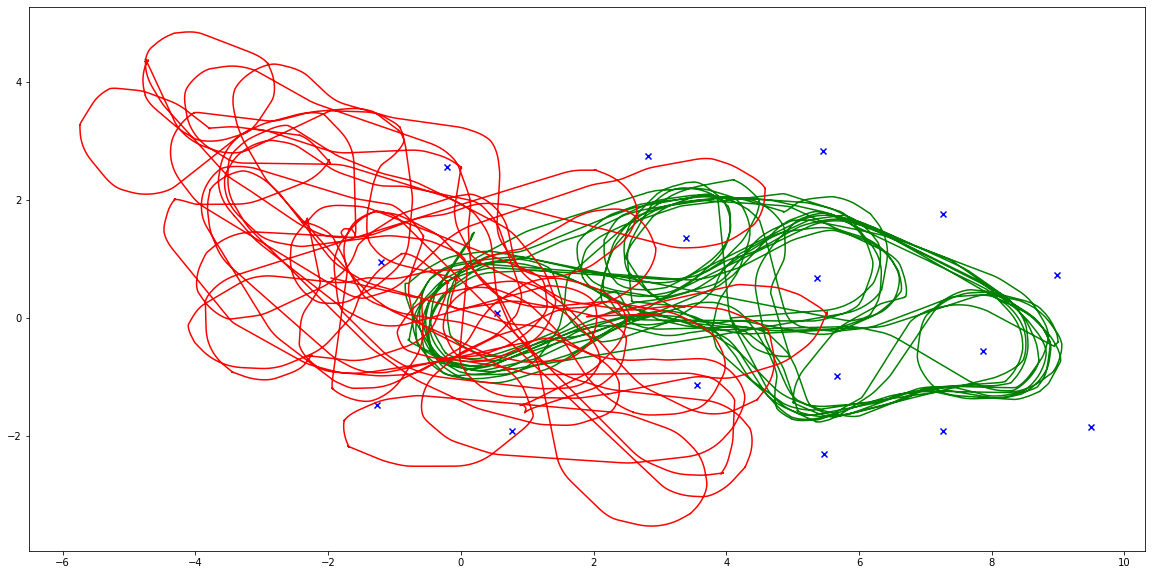

In [27]:
plt.figure(figsize=(20,10))
plt.plot(dataset['x_true'], dataset['y_true'], c='g')
plt.plot(x_motion, y_motion, c='r')
plt.scatter(x_landmark, y_landmark, c='b', marker = 'x')